<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx
import timeit

# Part I

In [2]:
n_v, n_e = 100, 500
G = nx.gnm_random_graph(n_v, n_e)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = np.random.randint(1,10)

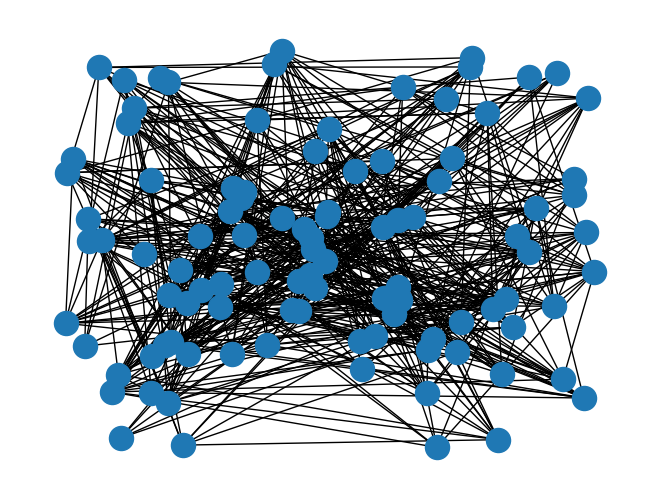

In [3]:
nx.draw(G, pos=nx.random_layout(G))

In [4]:
def time_execute(function, n, *args, **kwargs):
  t = 0
  for i in range(n):
    start = timeit.default_timer()
    function(*args, **kwargs)
    end = timeit.default_timer()
    t += end - start
  return t / n

In [5]:
avg_time_dijkstra = time_execute(nx.single_source_dijkstra, 10, G, 0)
avg_time_bellman_ford = time_execute(nx.single_source_bellman_ford, 10, G, 0)

print(f'Average time for Dijkstra\'s algorithm:\n{avg_time_dijkstra}')
print(f'Average time for Bellman-Ford algorithm:\n{avg_time_bellman_ford}')

Average time for Dijkstra's algorithm:
0.0011787093000009464
Average time for Bellman-Ford algorithm:
0.002197176799990075


# Part II

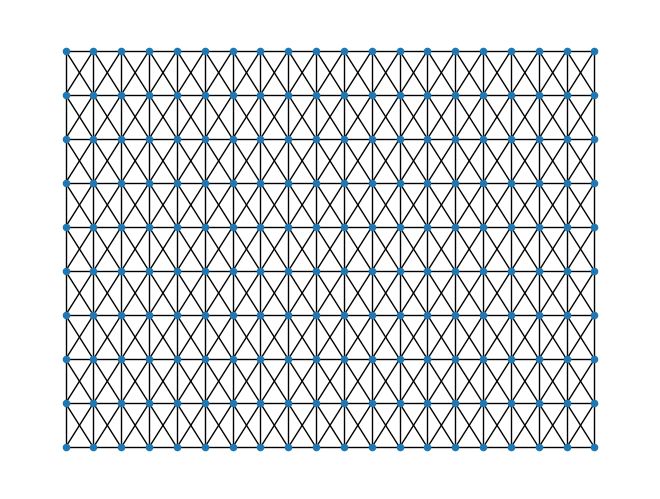

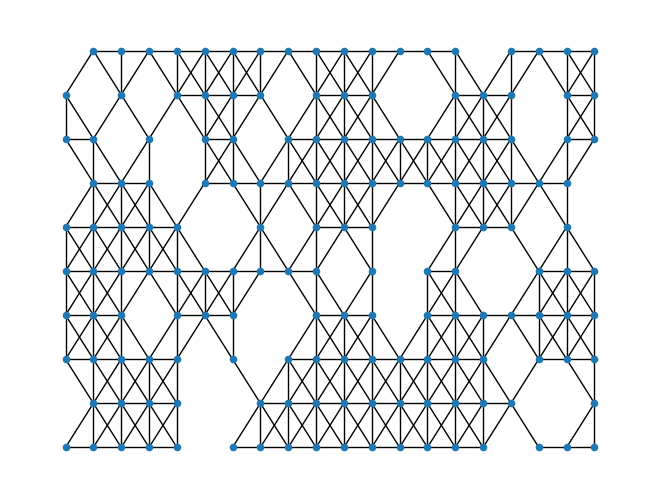

In [6]:
m, n = 10, 20
G = nx.grid_2d_graph(m, n)

for edge in G.edges:
    G.edges[edge]['weight'] = 1

G.add_edges_from([((x, y), (x+1, y+1)) for x in range(m-1) for y in range(n-1)] + [((x+1, y), (x, y+1))for x in range(m-1) for y in range(n-1)], weight=np.sqrt(2))

pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, node_size=20)
plt.show()

num_obstacle_cells = 40
obstacles_idx = np.random.choice(list(range(m*n)), num_obstacle_cells, replace=False)
obstacles = list(zip(obstacles_idx // n, obstacles_idx % n))
G.remove_nodes_from(obstacles)

nx.draw(G, pos, node_size=20)
plt.show()

In [7]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [8]:
nodes = np.array(nx.nodes(G))
paths = []
for i in range(5):
    start, target = np.random.choice(G.number_of_nodes(), 2, replace=False)
    start = tuple(nodes[start])
    target = tuple(nodes[target])
    path = nx.astar_path(G, start, target, heuristic=dist)
    print(f'Start: {start}, Target: {target}\nThe found path: {path}')
    paths.append(path)

Start: (0, 9), Target: (7, 3)
The found path: [(0, 9), (0, 8), (1, 7), (2, 6), (3, 5), (4, 4), (5, 4), (6, 4), (7, 3)]
Start: (7, 13), Target: (9, 6)
The found path: [(7, 13), (7, 12), (7, 11), (7, 10), (8, 9), (8, 8), (8, 7), (9, 6)]
Start: (6, 6), Target: (4, 1)
The found path: [(6, 6), (6, 5), (5, 4), (5, 3), (5, 2), (4, 1)]
Start: (0, 4), Target: (8, 4)
The found path: [(0, 4), (1, 4), (2, 3), (3, 3), (4, 3), (5, 3), (6, 4), (7, 4), (8, 4)]
Start: (8, 4), Target: (9, 11)
The found path: [(8, 4), (7, 4), (6, 5), (7, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 11)]


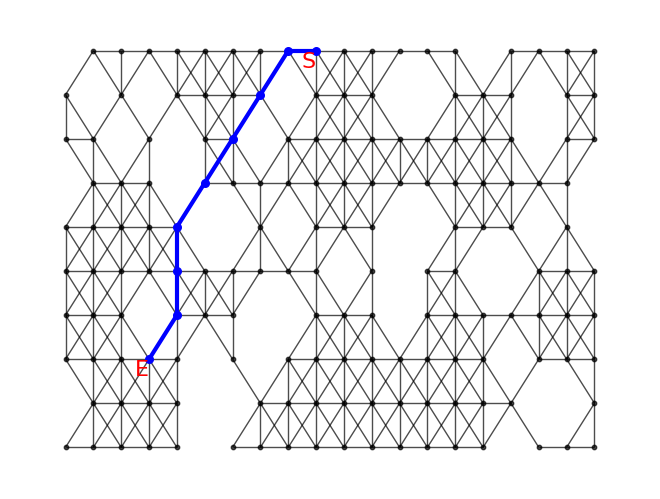

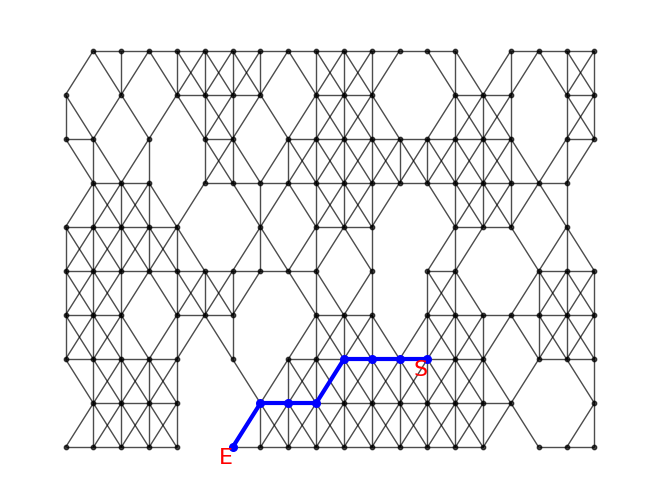

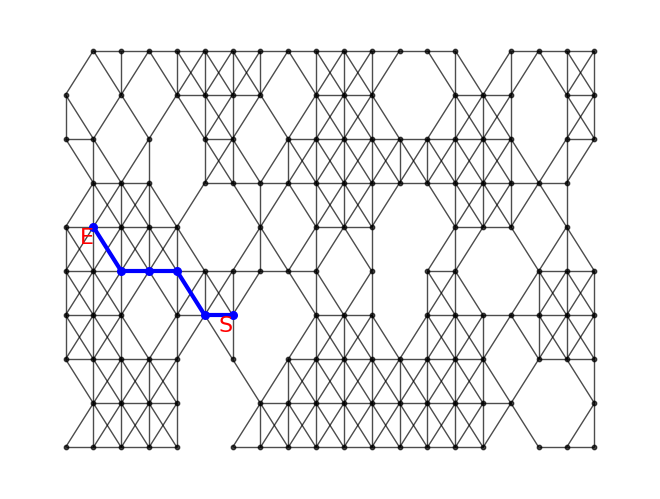

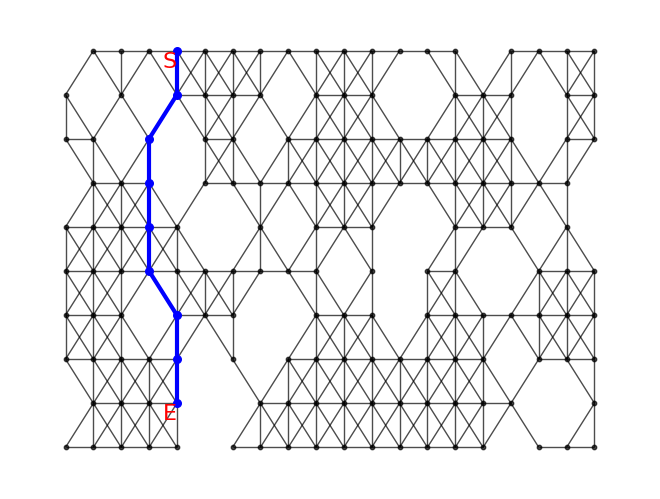

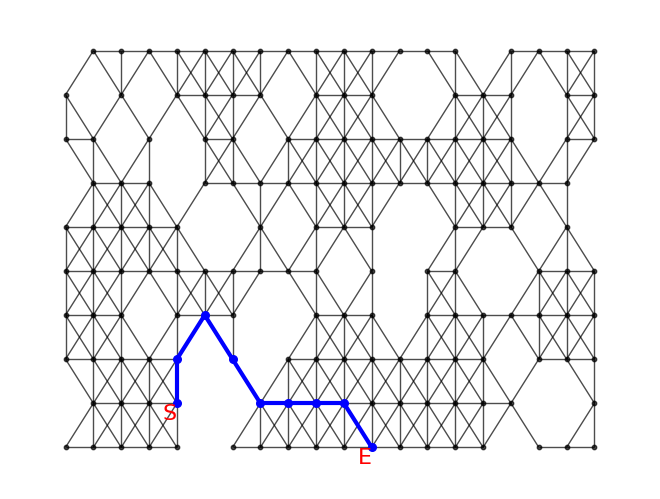

In [33]:
for path in paths:
    labels = {}
    labels[path[0]] = 'S'
    labels[path[-1]] = 'E'
    nx.draw(G, pos, node_size=10, node_color='k', alpha=0.7)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='b', node_size=30)
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path[:-1], path[1:])), edge_color='b', width = 3)
    nx.draw_networkx_labels(G, pos, labels, font_size=16, font_color='r', horizontalalignment='right', verticalalignment='top')
    plt.show()